## SciPy를 사용한 기초적인 검정¶
- 이항 검정 (Binomial test)
- 카이 제곱 검정 (Chi-square test)
- 단일 표본 z-검정 (One-sample z-test)
- 단일 표본 t-검정 (One-sample t-test)
- 독립 표본 t-검정 (Independent-two-sample t-test)
- 대응 표본 t-검정 (Paired-two-sample t-test)
- 분산 검정 (Chi squared variance test)
- 등분산 검정 (Equal-variance test)
- 정규성 검정 (Normality test)

##### binomial test

In [16]:
N = 10
theta_0 = 0.5 # 동전의 앞면이 나올 확률
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N) # 10번 던져보자
n = np.count_nonzero(x) # 10번 던졌더니 7번 앞면나왔네?

#10번 던졌는데 7번 앞면나왔어! 이거 fair한거냐?
sp.stats.binom_test(n, N) 
# 응 fair하다고 볼 수 있어

0.3437499999999999

In [18]:
N = 100
theta_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x) # 100번 던져서 앞면이 49번 나왔어

#얘는 fair한거야?
sp.stats.binom_test(n, N)
# 응 fair~

0.9204107626128206

In [19]:
N = 100
theta_0 = 0.35
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x) # 100번중에 31번

sp.stats.binom_test(n, N)
# 얘는 fair다고 볼 수 없어

0.00018314322488235352

##### 연습문제

In [20]:
# N = 10이고 유의 수준이 10%라면 앞면이 나온 횟수가 몇 번이어야지 동전이 fair하지 않다고 이야기 할 수 있을까?

In [21]:
N = 10
theta = 0.5
sp.stats.binom_test(2, N), sp.stats.binom_test(8, N)

(0.10937500000000003, 0.10937500000000003)

10번중 1번이하, 9번이상 나와야 fair하지 않다고 말할 수 있다.

N = 1000이고 유의 수준이 10%라면 앞면이 나온 횟수가 몇 번이어야지 동전이 fair하지 않다고 이야기 할 수 있을까? 이 때 fair하다고 이야기할 수 있는 경우의 범위는 N=10일 때와 비교하여 넓은가 혹은 좁은가?

In [22]:
N = 1000
theta = 0.5
sp.stats.binom_test(474, N), sp.stats.binom_test(526, N)

(0.10674954203435372, 0.10674954203435372)

$ N=10일때보다 N=1000일때  fair한 경우의 범위가 더 좁다.  \\
N이 엄청 커지면 특정 값에 범위가 한정되면서 웬만하면 reject된다. $ 

##### chisquare test
- 카테고리 분포의 모수 $ theta $ vector에 대한 가설을 조사하는 검정 방법
- 예를 들어 주사위를 6번 던졌을 때 주사위 1의 눈 $ x_1 $의 기댓값($ m_k$)은 1회다.

In [25]:
N = 10
K = 4
theta_0 = np.ones(K)/K # [0.25, 0.25, 0.25, 0.25,]
np.random.seed(0)
x = np.random.choice(K, N, p=theta_0)
n = np.bincount(x, minlength=K)
x, n

(array([2, 2, 2, 2, 1, 2, 1, 3, 3, 1], dtype=int64),
 array([0, 3, 5, 2], dtype=int64))

In [26]:
sp.stats.chisquare(n)
# 각 눈이 나올 확률은 fair하다고 볼 수 있다.

Power_divergenceResult(statistic=5.199999999999999, pvalue=0.157724450396663)

In [27]:
N = 100
K = 4
theta_0 = np.array([0.35, 0.30, 0.20, 0.15])
np.random.seed(0)
x = np.random.choice(K, N, p=theta_0)
n = np.bincount(x, minlength=K)

sp.stats.chisquare(n)
# 각 눈이 나올 확률이 fair다고 볼 수 없다.

Power_divergenceResult(statistic=16.56, pvalue=0.0008703471978912127)

##### 연습문제

In [28]:
# 4면체 주사위를 10번 던졌다. 만약 10번 모두 1이 나왔다면 주사위가 공정하다는 귀무 가설의 유의 확률은 얼마인가?

In [29]:
sp.stats.chisquare([10,0,0,0])
# 귀무가설 기각 : fair하다고 볼 수 없겠다.

Power_divergenceResult(statistic=30.0, pvalue=1.3800570312932553e-06)

##### 카이 제곱 검정은 어떤 카테고리 변수  X 가 다른 카테고리 변수  Y 와 상관 관계를 가지는가를 검증하는데 사용할 수도 있다.

In [30]:
# 예를 들어, X 가 0일 때 Y가 [10,10,20]이었고 X가 1일 때 Y가 [20,20,20]일때 
# 상관관계가 있는지 보고싶다면?
obs = np.array([[10, 10, 20], [20, 20, 20]])
sp.stats.chi2_contingency(obs)

(2.7777777777777777, 0.24935220877729622, 2, array([[12., 12., 16.],
        [18., 18., 24.]]))

- 첫번째 값은 test statistics, 두번째가 유의확률
- 귀무가설은 두 확률변수사이에 상관관계가 없다(correlation이 0이다.)
- 결과는 p-value가 0.249이므로 상관관계가 없다고 볼 수 있다.(accept)

##### one-sample z-test
- 분산을 정확하게 알고 있는 정규분포의 기댓값을 조사하는 검정방법
- 분산을 알고 있는 경우는 거의 없음.

In [33]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [34]:
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x.mean() - mu)/ np.sqrt(sigma2/len(x))
    return z, 2 * sp.stats.norm().sf(np.abs(z))
ztest_1samp(x)

(2.3338341854824276, 0.019604406021683538)

유의확률이 0.0196이므로 귀무가설 기각(mu는 0이라 볼 수 없다.)하지만 실제 mu는 0이다. 데이터 수가 10개로 부족해서 나온 결과
- 이처럼 귀무가설이 진실임에도 거짓으로 나온 경우를 Type 1 error라고 한다.

##### one-sample t-test
- 정규분포의 표본에 대해 기댓값을 조사하는 검정방법

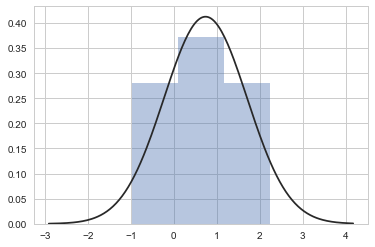

In [35]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

In [38]:
sp.stats.ttest_1samp(x, popmean=0)
# mu를 0으로 가정하고 했는데 mu가 0이 아니라는 결과가 나옴(type 1 error)
# 데이터 수가 10개로 부족해서 나온 결과

Ttest_1sampResult(statistic=2.28943967238967, pvalue=0.04781846490857058)

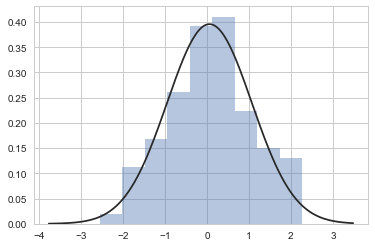

In [39]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()


In [41]:
sp.stats.ttest_1samp(x, popmean=0)
# 귀무가설 accept

Ttest_1sampResult(statistic=0.5904283402851698, pvalue=0.5562489158694675)